<a href="https://colab.research.google.com/github/tangshuting/daytoy/blob/master/VGG16me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# VGG16网络的搭建
# import keras
# from __future__ import print_function
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.convolutional import Conv2D  # 二维卷积层，即对图像的空域卷积。
from keras.layers.convolutional import MaxPooling2D  # 空间池化（也叫亚采样或下采样）降低了每个特征映射的维度，但是保留了最重要的信息
from keras.layers import Flatten, Dense # Flatten层用来将输入“压平”，即把多维的输入一维化，常用在从卷积层到全连接层的过渡。Flatten不影响batch的大小。
from tensorflow.keras import backend as K
import matplotlib as mpl 
import matplotlib.pyplot as plt
from keras.utils import np_utils
import numpy as np

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data() #第一个元组储存训练好的图片和对应标签,第二个元组是未分类图片
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)    #样本规模，像素通道，长度，宽度 四维
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 给定的像素的灰度值在0-255，为了使模型的训练效果更好，通常将数值归一化映射到0-1
# astype函数修改数据类型为浮点型
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# one hot encoding，convert class vectors to binary class matrices
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:

# def create_VGG16():
VGG16= Sequential()
VGG16.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
    
VGG16.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
    
VGG16.add(MaxPooling2D(2, 2))

VGG16.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
VGG16.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
VGG16.add(MaxPooling2D(2, 2))

VGG16.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
VGG16.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
VGG16.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
VGG16.add(MaxPooling2D(2, 2))

VGG16.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
VGG16.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
VGG16.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
VGG16.add(MaxPooling2D(2, 2))

VGG16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
VGG16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
VGG16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

VGG16.add(Flatten())

VGG16.add(Dense(1024, activation='relu'))
VGG16.add(Dense(1024, activation='relu'))
VGG16.add(Dense(10, activation='softmax')) #最后一层是输出层，有10个神经元，每个神经元对应一个类别，输出值表示样本属于该类别的概率大小。

In [0]:
# 模型概括打印
VGG16.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 7, 7, 64)         

In [0]:
VGG16.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
# return VGG16

batch_size = 64
epochs = 1
# VGG16.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_test, y_test))
VGG16.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/1
 - 420s - loss: 1.0512 - acc: 0.6158


In [0]:
#评估模型
score = VGG16.evaluate(x_test, y_test)
print('loss： %.4lf' % score[0])
print('accuracy: ', score[1])

10000/10000 [==============================] - 10s 1ms/step
loss： 0.2161
accuracy:  0.9397000074386597


y_true: 7
y_true: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
iamge: (1, 28, 28, 1)
y_true: (10,)


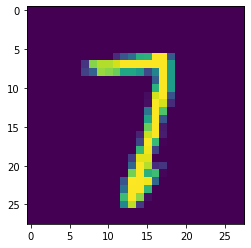

In [0]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
image = x_test[234]
y_true = y_test[234]
print ('y_true:',y_true)
plt.figure()
plt.imshow(image)
image = image.reshape(-1,28,28,1).astype('float32')
iamge = image/255
y_true = np_utils.to_categorical(1,10)  #one-hot编码
print ('y_true:',y_true)
print ('iamge:',image.shape)
print ('y_true:',y_true.shape)

In [0]:
from tensorflow.keras import backend, losses
from tensorflow.keras import backend as K

In [0]:
def fgsm( VGG16, image, y_true, eps=0.1):
   
    #image_pred = m_model.predict_classes(img)
    predict = VGG16.predict(image)
    image_pred = np.argmax(predict,axis=1)
    image_pred = np_utils.to_categorical(image_pred, 10)

    loss = losses.categorical_crossentropy(y_true, image_pred)
    gradient = backend.gradients(loss, y_true)   
    gradient = gradient[0]

    adv = image + backend.sign(gradient) * eps  # fgsm算法

    # sess = backend.get_session()   #设置会话
    # adv = sess.run(adv, feed_dict={model.input: image})  # 注意这里传递参数的情况
    adv = np.clip(adv, 0, 1)  
    return adv

In [0]:
def fgsm_attack(image):
   
    epsilons = [0, 0.01, 0.1, 0.15, 0.2]

    print("开始使用fgsm进行攻击")
    for i, eps in enumerate(epsilons):
        img_attack = fgsm(VGG16, image, y_true, eps=eps)
        plt.figure()
        plt.imshow(img_attack)
        #attack =keras.m_model.predict_classes(img_attack)
        attack = VGG16.predict(img_attack)
        fgsm_attack = np.argmax(attackt,axis=1)
        Y_adv = np_utils.to_categorical(fgsm_attack, 10)

        # 当识别的结果不等时，表示攻击成功
        #if attack != y_pred:
        if Y_adv != image_pred:
            print('攻击成功，攻击后的结果为：', Y_adv)
fgsm_attack(image)


开始使用fgsm进行攻击


ValueError: ignored